In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sb
import datetime as dt

In [8]:
input_path = Path('../Kozlova/data/raw/life_expectancy_data.csv')

In [9]:
df = pd.read_csv(input_path)

In [10]:
print(df.shape)

(2732, 22)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2732 non-null   object 
 1   Year                             2732 non-null   int64  
 2   Status                           2732 non-null   object 
 3   Life expectancy                  2724 non-null   float64
 4   Adult Mortality                  2724 non-null   float64
 5   infant deaths                    2732 non-null   int64  
 6   Alcohol                          2547 non-null   float64
 7   percentage expenditure           2732 non-null   float64
 8   Hepatitis B                      2207 non-null   float64
 9   Measles                          2732 non-null   int64  
 10   BMI                             2699 non-null   float64
 11  under-five deaths                2732 non-null   int64  
 12  Polio               

In [12]:
df.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2732,2732.000000,2732,2724.000000,2724.000000,2732.000000,2547.000000,2732.000000,2207.000000,2732.000000,...,2714.000000,2517.000000,2714.000000,2732.000000,2317.000000,2.128000e+03,2699.000000,2699.000000,2577.000000,2581.000000
unique,191,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Guinea,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.501098,NaN,69.120228,165.923642,30.588946,4.555748,727.049563,80.860897,2430.580527,...,82.409359,5.946007,82.273397,1.722328,7316.813082,1.245470e+07,4.903927,4.935495,0.624236,11.951724
std,NaN,4.626314,NaN,9.511317,123.837567,118.158278,4.034548,1974.303746,25.130776,11240.642911,...,23.421806,2.506294,23.628897,4.962085,14020.856082,5.761456e+07,4.448684,4.540056,0.211894,3.376084
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.000000,NaN,63.000000,75.000000,0.000000,0.850000,4.595646,77.000000,0.000000,...,77.000000,4.280000,78.000000,0.100000,464.184650,1.917392e+05,1.600000,1.600000,0.489000,10.100000
50%,NaN,2007.000000,NaN,72.000000,145.000000,3.000000,3.650000,64.395284,92.000000,17.000000,...,93.000000,5.730000,93.000000,0.100000,1741.142552,1.383743e+06,3.400000,3.400000,0.675000,12.300000
75%,NaN,2012.000000,NaN,75.600000,228.250000,23.000000,7.600000,437.086674,97.000000,370.500000,...,97.000000,7.500000,97.000000,0.800000,5828.745662,7.475598e+06,7.200000,7.300000,0.776000,14.200000


In [13]:
df.columns = df.columns.map(lambda x : x.replace("-", "_").replace(" ", "_"))

In [14]:
df.head(2732)

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1_19_years,_thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2728,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2729,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2730,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Деление стран по регионам

In [15]:
Africa = (
'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea',
'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
'South Sudan', 'Sudan', 'Swaziland', 'United Republic of Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Cabo Verde', 'Côte d\'Ivoire')
Asia = (
'Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Myanmar', 'Cambodia', 'China', 'Timor-Leste',
'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Democratic People\'s Republic of Korea', 'Republic of Korea',
'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'Oman', 'Pakistan',
'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan',
'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen')
Europe = (
'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta',
'Republic of Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia',
'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom of Great Britain and Northern Ireland', 'Vatican City', 'The former Yugoslav republic of Macedonia')
North_America = ('Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
                 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
                 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
                 'Trinidad and Tobago', 'United States of America')
South_America = (
'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay',
'Venezuela (Bolivarian Republic of)')
Australia_Oceania = (
'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu')

In [16]:
country = df['Country'].unique()
for i in range(len(Africa)):
    df.loc[df['Country'] == Africa[i], 'Region'] = 'Africa'
for i in range(len(Asia)):
    df.loc[df['Country'] == Asia[i], 'Region'] = 'Asia'
for i in range(len(Europe)):
    df.loc[df['Country'] == Europe[i], 'Region'] = 'Europe'
for i in range(len(North_America)):
    df.loc[df['Country'] == North_America[i], 'Region'] = 'North_America'
for i in range(len(South_America)):
    df.loc[df['Country'] == South_America[i], 'Region'] = 'South_America'
for i in range(len(Australia_Oceania)):
    df.loc[df['Country'] == Australia_Oceania[i], 'Region'] = 'Australia_Oceania'

In [17]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy_                     8
Adult_Mortality                      8
infant_deaths                        0
Alcohol                            185
percentage_expenditure               0
Hepatitis_B                        525
Measles_                             0
_BMI_                               33
under_five_deaths_                   0
Polio                               18
Total_expenditure                  215
Diphtheria_                         18
_HIV/AIDS                            0
GDP                                415
Population                         604
_thinness__1_19_years               33
_thinness_5_9_years                 33
Income_composition_of_resources    155
Schooling                          151
Region                               1
dtype: int64

In [18]:
df.loc[df['Life_expectancy_'].isnull()]

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1_19_years,_thinness_5_9_years,Income_composition_of_resources,Schooling,Region
1543,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,Australia_Oceania
1604,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,Europe
1693,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,Australia_Oceania
1783,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1825,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,Australia_Oceania
2012,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,North_America
2053,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,Europe
2521,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,Australia_Oceania


Так как данные 8 стран составляют 4 процента от общего количества стран, а также практически не содержат данных, которые можно использовать для анализа продолжительности жизни, удалим их из датасета.

In [19]:
df = df.drop(1543)
df = df.drop(1604)
df = df.drop(1693)
df = df.drop(1783)
df = df.drop(1825)
df = df.drop(2012)
df = df.drop(2053)
df = df.drop(2521)

In [20]:
# df.Country = pd.Categorical(df.Country)
# df = df.assign(Country=df.Country.cat.codes)
# df.Status  = pd.Categorical(df.Status)
# df = df.assign(Status=df.Status.cat.codes)

In [21]:
pd.crosstab(index=df.Country, columns=df.Year, values=df.Life_expectancy_, aggfunc=np.mean)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,54.8,55.3,56.2,56.7,57.0,57.3,57.3,NaN,58.1,58.6,58.8,59.2,59.5,59.9,59.9,65.0
Albania,72.6,73.6,73.3,72.8,73.0,73.5,74.2,75.9,NaN,76.1,76.2,76.6,76.9,77.2,77.5,77.8
Algeria,71.3,71.4,71.6,71.7,72.3,NaN,73.4,73.8,74.1,74.4,74.7,74.9,75.1,75.3,75.4,75.6
Angola,45.3,45.7,46.5,46.8,47.1,47.4,47.7,48.2,48.7,49.1,49.6,51.0,56.0,51.1,51.7,52.4
Antigua and Barbuda,73.6,73.8,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.7,75.9,76.1,76.2,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),72.5,72.5,73.1,72.4,73.3,73.6,73.6,73.4,NaN,73.6,73.7,73.8,73.7,73.8,73.9,74.1
Viet Nam,73.4,NaN,73.8,74.0,74.2,74.4,74.6,74.7,74.9,75.0,75.2,75.4,75.6,75.7,75.9,76.0
Yemen,68.0,61.1,NaN,61.9,62.2,62.6,63.0,63.4,63.8,64.1,64.4,64.6,64.7,65.4,65.4,65.7


Посмотрим корреляцию

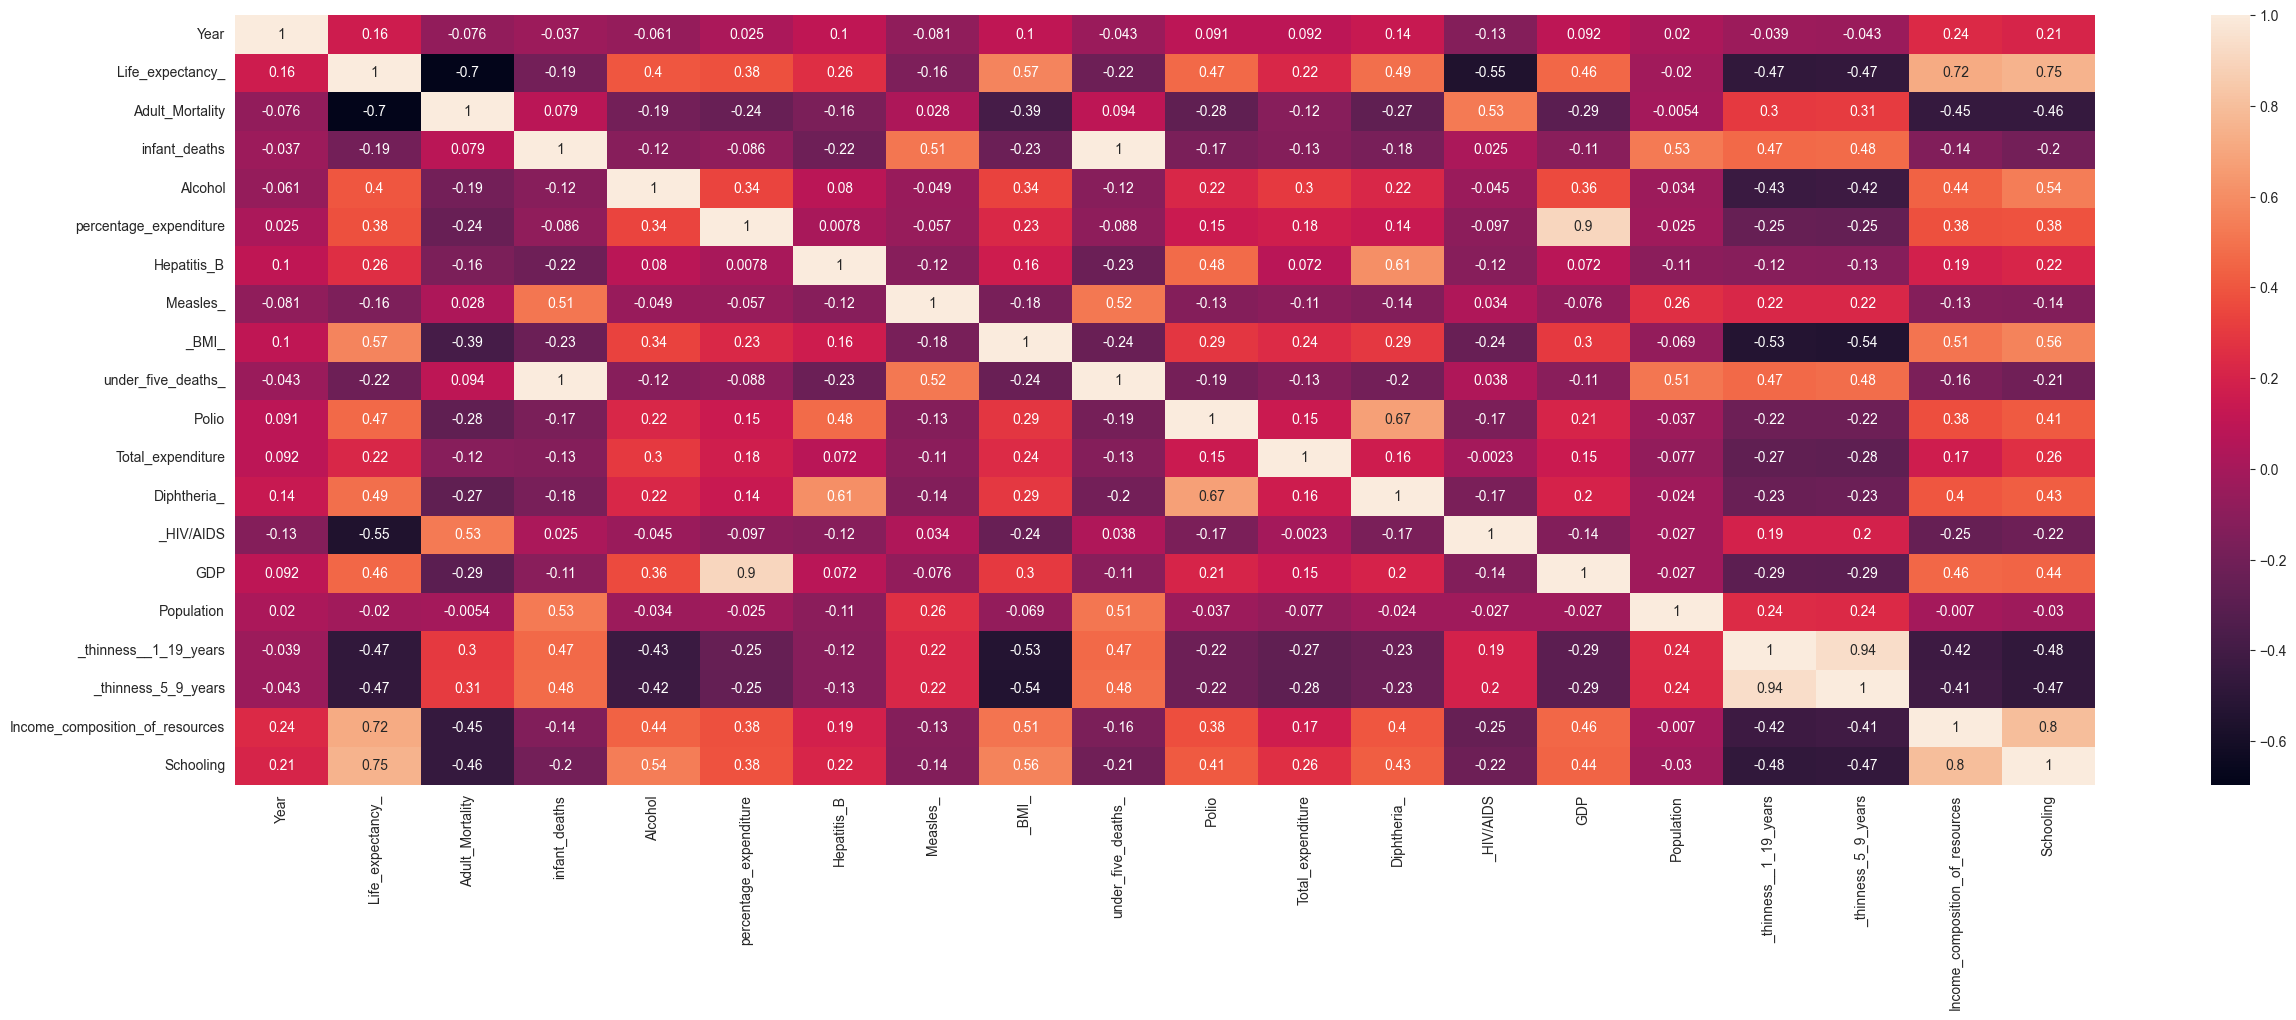

In [28]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30, 10))
ax = sb.heatmap(corr, annot=True)
plt.show()

По полученным корреляционным значениям можно сказать, что наибольшая взаимосвязь, которую мы можем использовать для обучения, наблюдается между продолжительностью жизни, количеством лет обучения в школе, индексом человеческого развития с точки зрения структуры доходов ресурсов. Достаточно большая обратная корреляция наблюдается между продолжительностью жизни, коэффициентом смертности среди взрослых обоих полов, а также статусом стран (где 1 - это развивающиеся, а 0 - развитые)

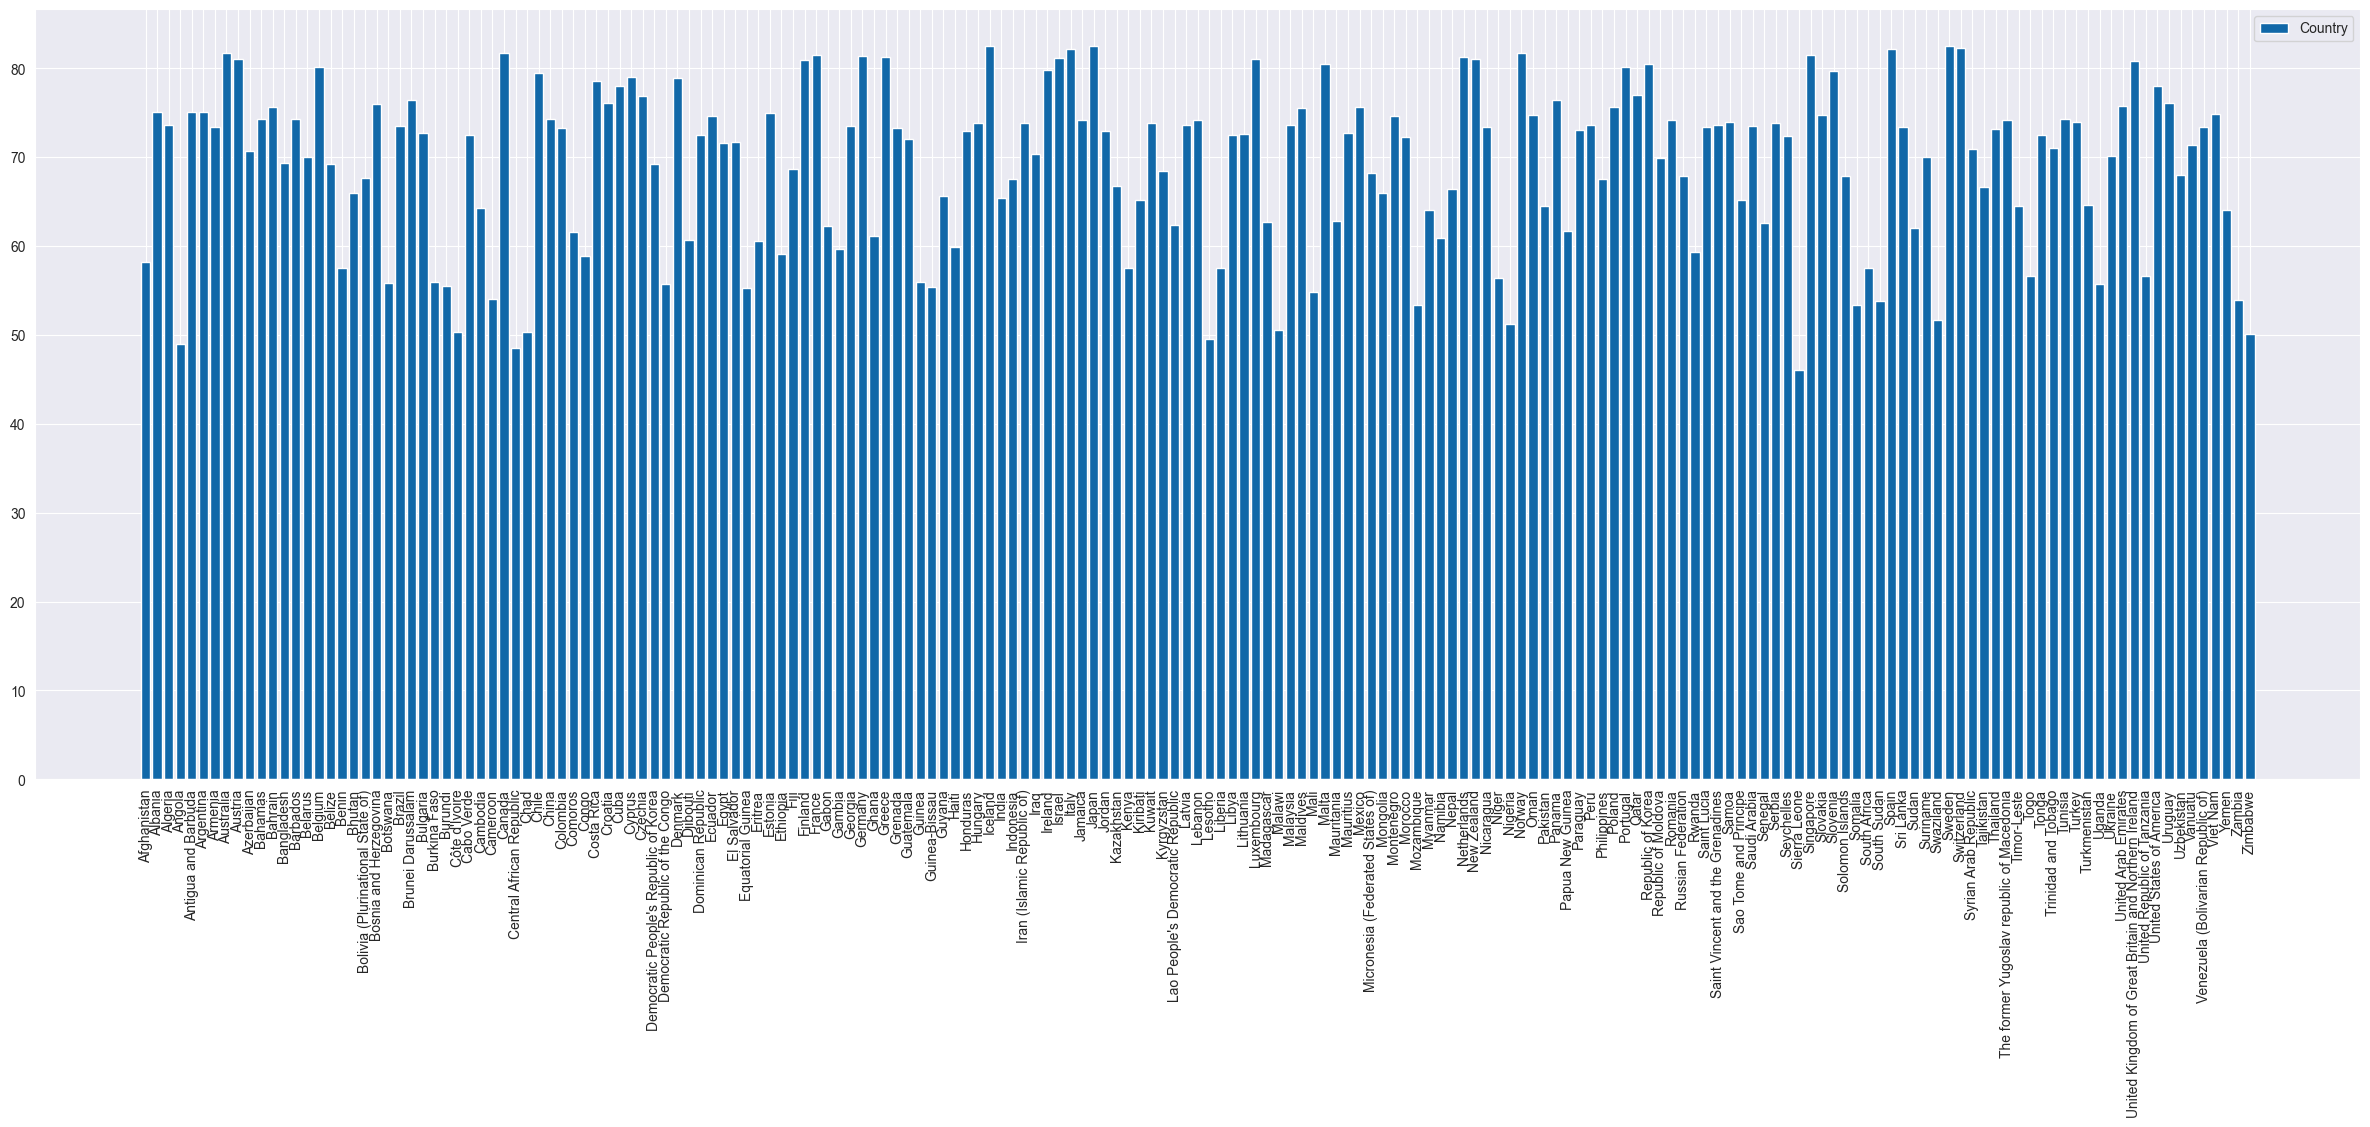

In [23]:
plt.figure(figsize=(30,10))
barWidth = 0.25
settings = df['Country'].unique()
avr_pre = []
for setting in settings:
    avr_pre.append(df['Life_expectancy_'].loc[df['Country'] == setting].mean())
bars =plt.bar(settings, avr_pre, color='#1168A8', label='Country')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Отсортируем данные для удобства

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


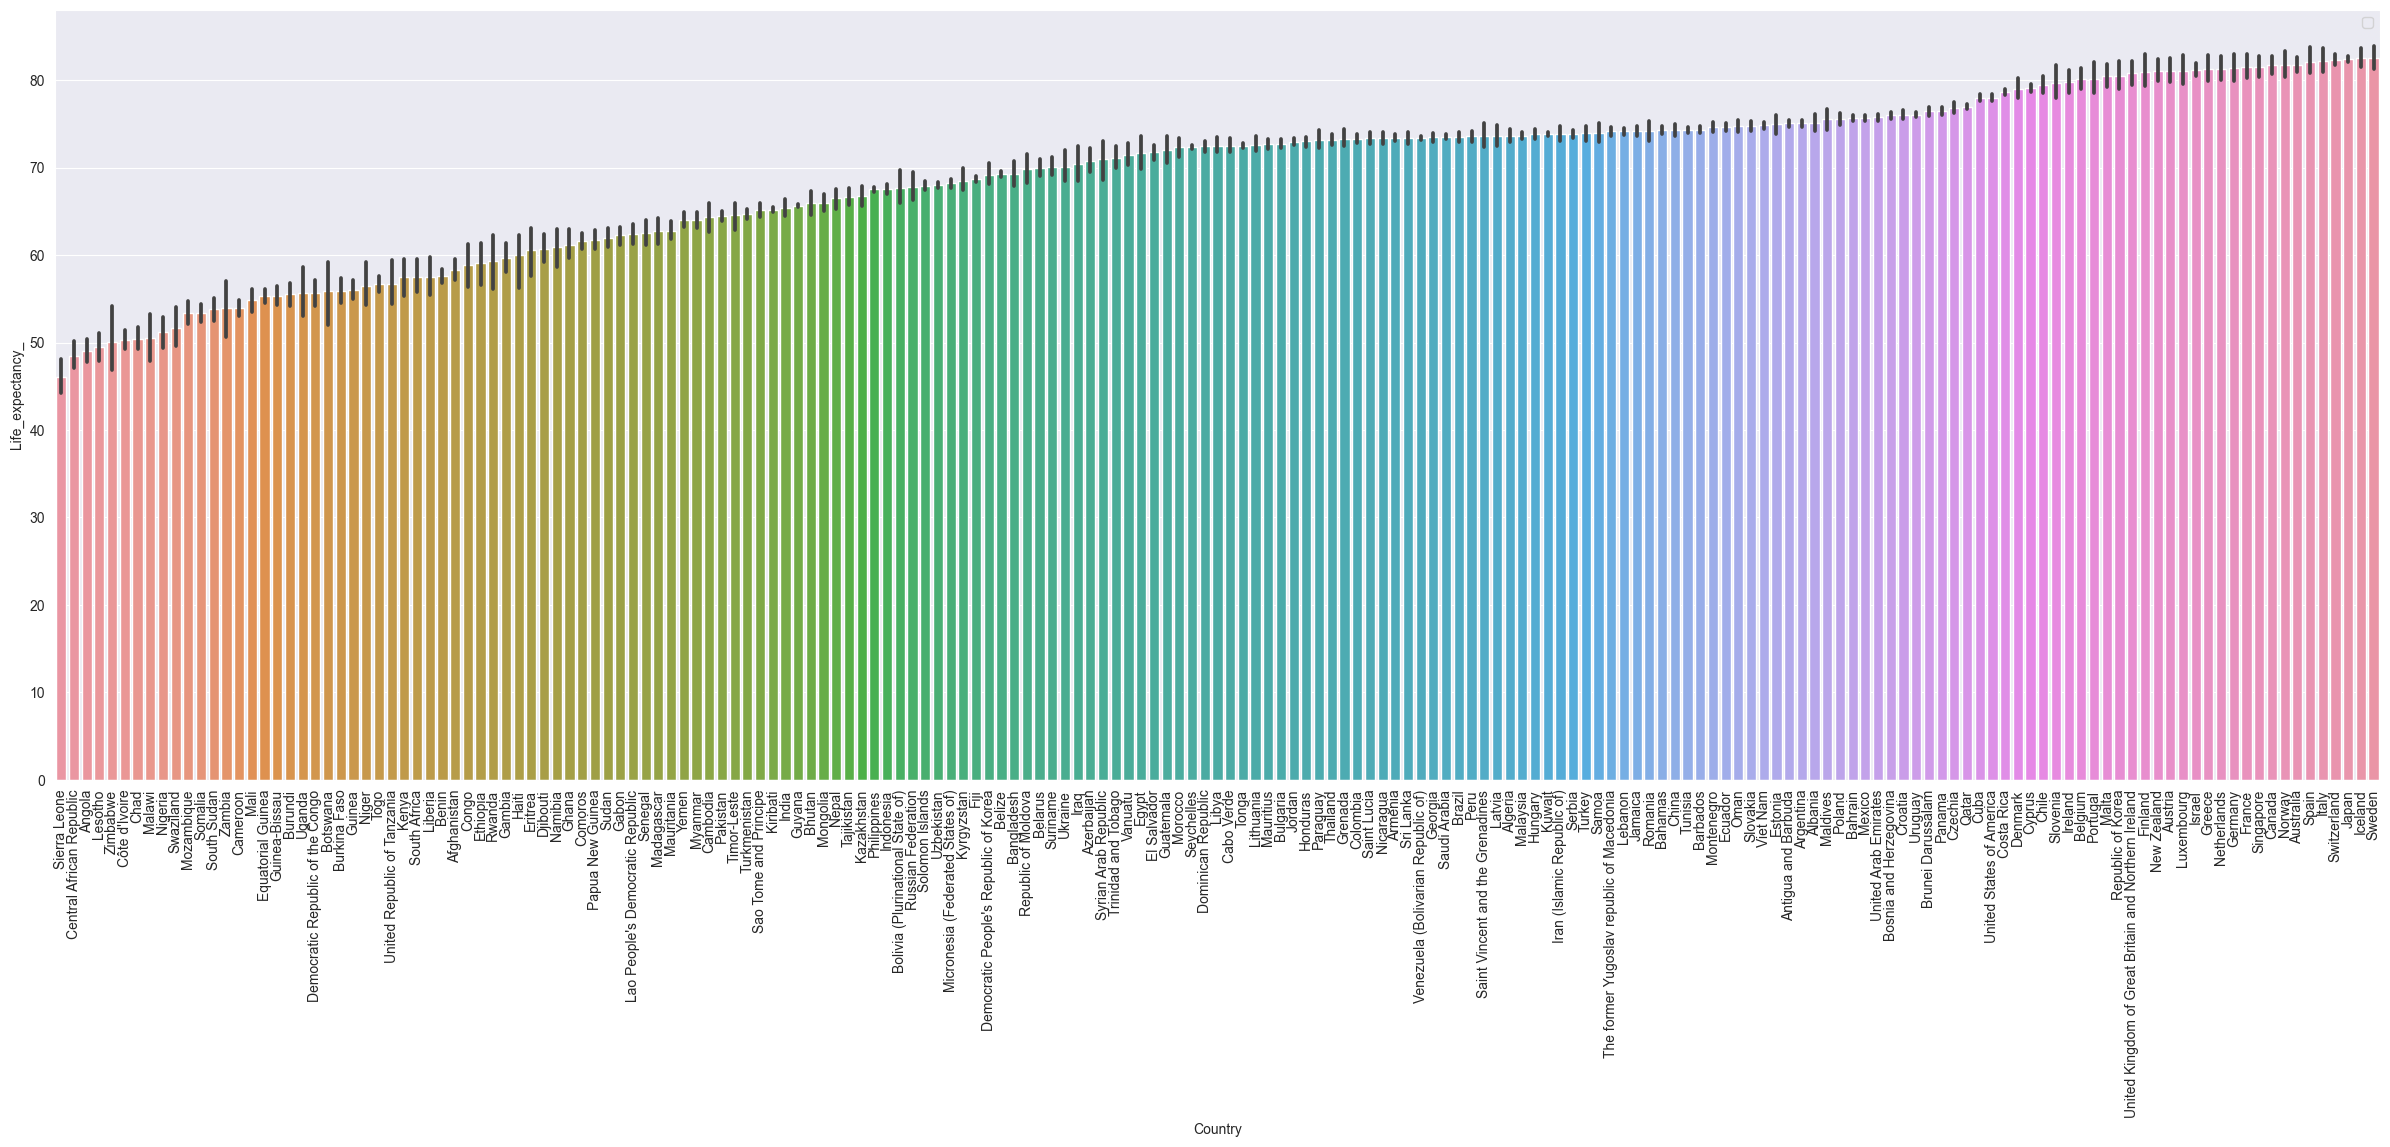

In [24]:
plt.figure(figsize=(30,10))
barWidth = 0.25
df_sort =  df.sort_values('Life_expectancy_', ascending=False)
countries = df_sort['Country'].unique()
life = []
result = df.groupby(["Country"])['Life_expectancy_'].mean().reset_index().sort_values('Life_expectancy_')
sb.barplot(x='Country', y="Life_expectancy_", data=df, order=result['Country'])
plt.xticks(rotation=90)
plt.legend()
plt.show()


Так как стран слишком много, то сгруппируем их по регионам (это было сделано выше). Отобразим продолжительность жизни в разных регионах на графике.

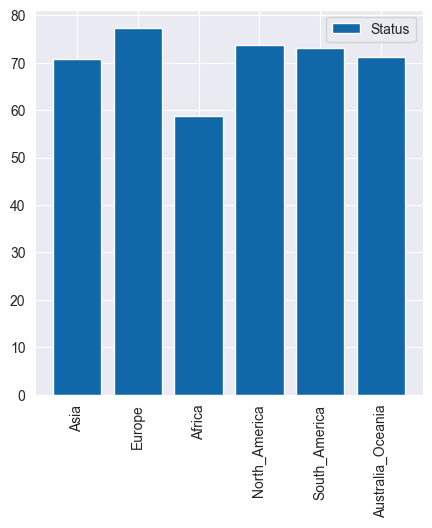

In [25]:
plt.figure(figsize=(5,5))
barWidth = 0.25
settings = df['Region'].unique()
avr_pre = []
for setting in settings:
    avr_pre.append(df['Life_expectancy_'].loc[df['Region'] == setting].mean())
avr_post = []
pos1 = np.arange(len(avr_pre))
bars =plt.bar(settings, avr_pre, color='#1168A8', label='Status')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Из получившейся гистограммы видно, что наибольшая продолжительность жизни наблюдается в Европе, а наименьшая - в Африке.

Проведем анализ по другим параметрам.

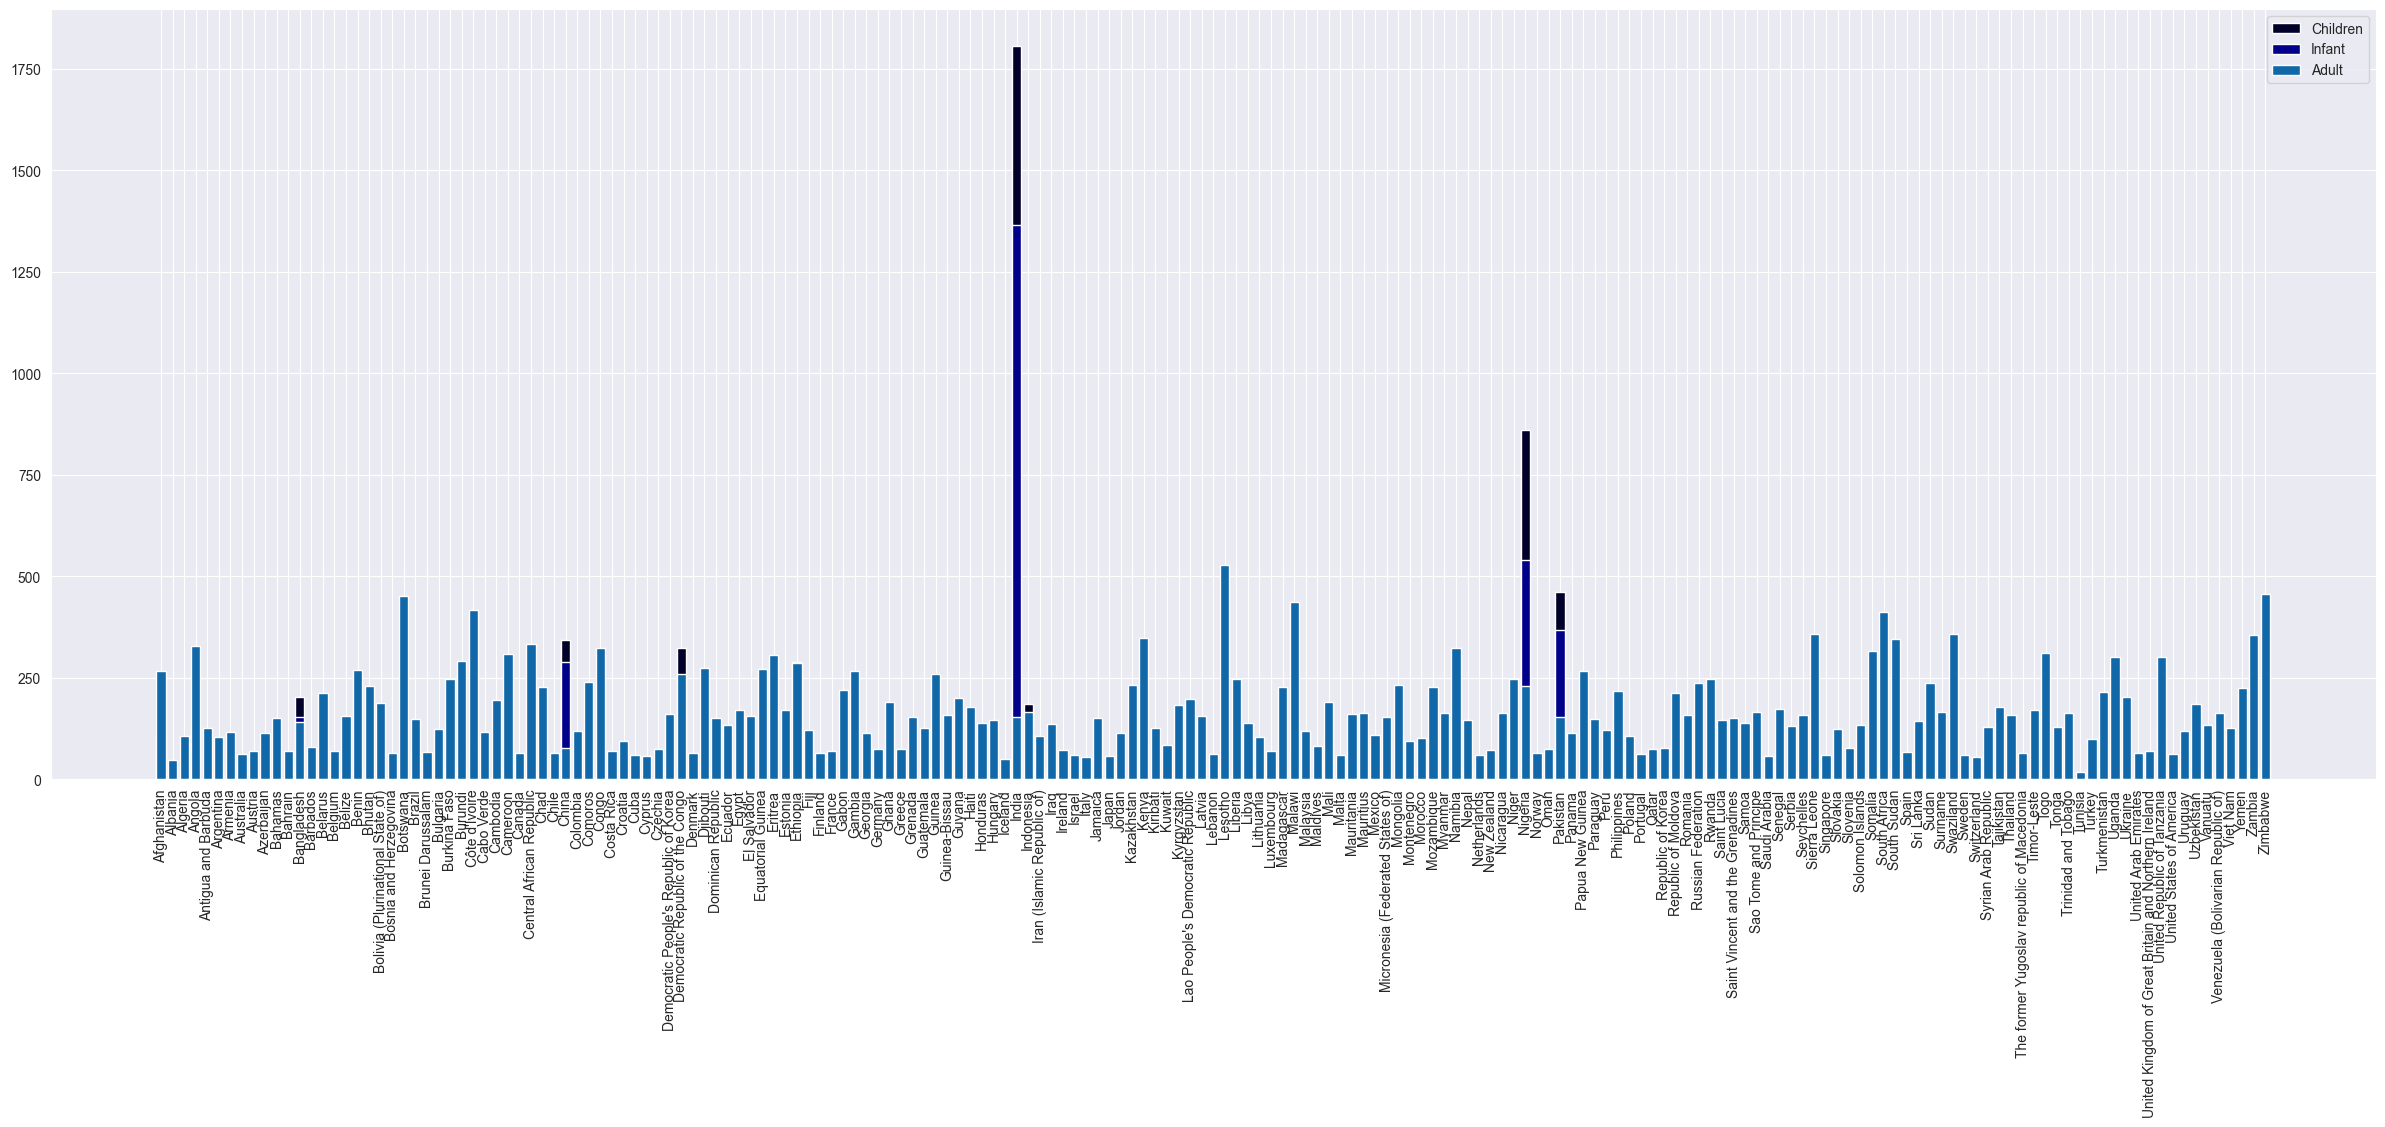

In [26]:
plt.figure(figsize=(30,10))
x = df['Country'].unique()
y1 = []
y2 = []
y3 = []
for setting in x:
    y1.append(df['Adult_Mortality'].loc[df['Country'] == setting].mean())
for setting in x:
    y2.append(df['under_five_deaths_'].loc[df['Country'] == setting].mean())
for setting in x:
    y3.append(df['infant_deaths'].loc[df['Country'] == setting].mean())

bars1 =plt.bar(x, y2, color='#000029', label='Children')
bars2 =plt.bar(x, y3, color='#00008b', label='Infant')
bars =plt.bar(x, y1, color='#1168A8', label='Adult')
plt.xticks(rotation=90)
plt.legend()
plt.show()

В большинстве случаев коэффициенты смертности среди взрослых обоих полов больше, чем коэффициенты детской смертности, следовательно как "фичу" можно использовать только взрослую смертность.

AttributeError: 'str' object has no attribute 'get_height'

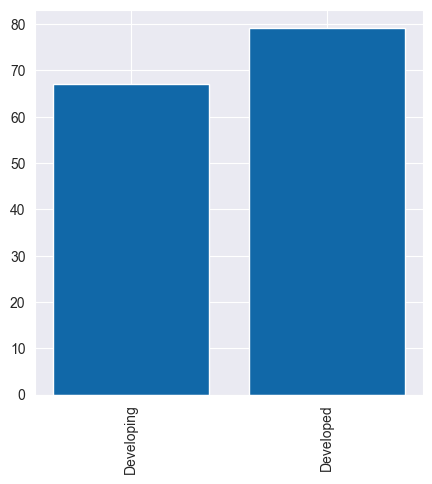

In [27]:
plt.figure(figsize=(5,5))
barWidth = 0.25
settings = df['Status'].unique()
avr_pre = []
for setting in settings:
    avr_pre.append(df['Life_expectancy_'].loc[df['Status'] == setting].mean())
avr_post = []
pos1 = np.arange(len(avr_pre))
bars =plt.bar(settings, avr_pre, color='#1168A8', label='Status')
plt.xticks(rotation=90)
for bar, value in zip(settings, avr_pre):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.legend()
plt.show()

Как видно из гистограммы, продолжительность в развитых странах выше, чем в развивающихся.

In [ ]:
plt.scatter(df.Income_composition_of_resources,df.Life_expectancy_,label = 'Class 1',marker='o' , color = 'b')
plt.xlabel('Income composition of resource' , fontsize = 12)
plt.ylabel('Life expectancy ' , fontsize = 12)
plt.title ('Scatter Graph')
plt.show()

Так как на графике присутствуют нулевые значения для некоторых годов, возьмем среднее значение продолжительности жизни и индекса по странам

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['Income_composition_of_resources'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x,y,label = 'Class 1',marker='o' , color = 'b')
plt.xlabel('Income composition of resource' , fontsize = 12)
plt.ylabel('Life expectancy ' , fontsize = 12)
plt.title ('Scatter Graph')
plt.show()

Из точечного графика, чем больше индекс человеческого развития с точки зрения структуры доходов ресурсов, тем в среднем больше продолжительность жизни. Можно наблюдать практически линейную зависимость.

In [ ]:
plt.scatter(df.percentage_expenditure,df.Life_expectancy_,label = 'Class 1',marker='o' , color = 'b')
plt.xlabel('Percentage expenditure' , fontsize = 12)
plt.ylabel('Life expectancy ' , fontsize = 12)
plt.title ('Scatter Graph')
plt.show()

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['percentage_expenditure'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x,y,label = 'Class 1',marker='o' , color = 'b')
plt.xlabel('Percentage expenditure' , fontsize = 12)
plt.ylabel('Life expectancy ' , fontsize = 12)
plt.title ('Scatter Graph')
plt.show()

Как видно из графика, расходы на здравоохранение как процент от валового внутреннего продукта на душу населения значительное влияние оказывает только при высоком уровне жизни. Однако, ВВП у стран может сильно отличаться, то необходимо посмотреть расходы на здравоохранение в денежном эквиваленте.

In [ ]:
plt.figure(figsize=(30,20))
x_mean = df['Country'].unique()
df ['expenditure_on_healthcare'] = df.percentage_expenditure*df.GDP;
x = []
y = []
z = []
for xs in x_mean:
    x.append(df['expenditure_on_healthcare'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('Percentage expenditure', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

Как видно, ситуация не улучшилась. В целом можно предположить, что чем больше расходов на здравоохранение, тем больше продолжительность жизни в стране. Однако, данных либо нет, либо они очень низкие, поэтому использование этих данных, по моему мнению, будет нецелесообразным.

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['Schooling'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('Schooling', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

Можно также наблюдать практически линейную зависимость между количеством лет обучения в школе и продолжительностью жизни. Можно использовать для обучения.

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['_BMI_'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

Несмотря на достаточно высокую корреляцию между индексом массы тела и продолжительностью жизни, по графику сложно точно определить зависимость между этими двумя величинами.

In [ ]:
plt.figure(figsize=(30,10))
sb.histplot(x="Life_expectancy_", data=df.loc[df['Year'].isin([2000,2005,2010,2015])],palette="bright", kde=True, hue='Year', bins=40)
plt.show()

Из полученной гистограммы можно увидеть, что в 2000 году продолжительность жизни была меньше всего, а в 2015 - наибольшая. То есть можно сделать вывод, что с увеличением года продолжительность жизни возрастает.

In [ ]:
plt.figure(figsize=(5,5))
barWidth = 0.25
settings = df['Country'].unique()
avr_pre = []
x_true = []
for setting in settings:
    avr_pre.append(df['Life_expectancy_'].loc[df['Country'] == setting].mean())
    x_true.append(df['Adult_Mortality'].loc[df['Country'] == setting].mean())
plt.scatter(x_true, avr_pre, label='Class 1', marker='o', color='b')
plt.legend()
plt.show()

Как уже было замечено ранее, между продолжительностью жизни и коэффициентом смертности среди взрослых обоих полом можно наблюдать практически линейную обратную зависимость.

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['Polio'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('Polio', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['_HIV/AIDS'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('HIV/AIDS', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['Diphtheria_'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('Diphtheria_', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['Alcohol'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

In [ ]:
x_mean = df['Country'].unique()
x = []
y = []
for xs in x_mean:
    x.append(df['GDP'].loc[df['Country'] == xs].mean())
    y.append(df['Life_expectancy_'].loc[df['Country'] == xs].mean())
plt.scatter(x, y, label='Class 1', marker='o', color='b')
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)
plt.title('Scatter Graph')
plt.show()

Вывод:
После проведения анализа данных из датасета было удалено 8 стран из 191, что составляет всего 4 процента от общего количества стран. Данные страны практически не содержат данных, которые можно использовать для восстановления статистики о продолжительности жизни в них. поэтому было принято решения удалить их.
Далее страны были поделены на 6 регионов: Африка, Азия, Европа, Северная Америка, Южная Америка и Австралия с Океанией. После проведения анализа данных, было отмечено, что наибольшая продолжительность жизни наблюдается в Европе, а наименьшая - в Африке.
Были получены корреляционные значения, по которым можно сказать, что наибольшая взаимосвязь, которую мы можем использовать для обучения, наблюдается между продолжительностью жизни, количеством лет обучения в школе, индексом человеческого развития с точки зрения структуры доходов ресурсов, а также индексом массы тела. Достаточно большая обратная корреляция наблюдается между продолжительностью жизни, коэффициентом смертности среди взрослых обоих полов, а также статусом стран (где 1 - это развивающиеся, а 0 - развитые).
По дальнейшему анализу данных можно сказать, что: продолжительность жизни в развитых странах действительно выше, чем в развивающихся; чем больше индекс человеческого развития с точки зрения структуры доходов ресурсов, тем в среднем больше продолжительность жизни; можно также наблюдать практически линейную зависимость между количеством лет обучения в школе и продолжительностью жизни; с увеличением года продолжительность жизни возрастает; и, наконец, между продолжительностью жизни и коэффициентом смертности среди взрослых обоих полом можно наблюдать практически линейную обратную зависимость.  Кроме того, использование индекса массы тела и расходов на здравоохранение не является целесообразным, так как не удается отследить точную зависимость.
Итак, для обучения можно взять: Year, Status,  Income composition of resources, Schooling, Adult Mortality, Region